### Wandb training data

In [ ]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
wandb.login()
api = wandb.Api()

In [ ]:
# runs = api.runs

test_run = api.run("tu18537/disco/2b6eccap")
hist = test_run.history(keys=['rollout/ep_rew_mean'])
df = pd.DataFrame(hist)
df.head
df_sort = df.sort_values('_step')

df_sort.plot(x='_step', y='rollout/ep_rew_mean')



In [ ]:
df.head()

### Trained evaluation data old


In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read the csv file
df = pd.read_csv('thesis_reward_investigation.csv')

In [ ]:
# df

In [ ]:

perching_standard_wind = df.iloc[:, :7]
perching_long_wind = df.iloc[:, 8:15]
perching_standard_no_wind = df.iloc[:, 16:]


In [ ]:
perching_standard_wind = perching_standard_wind.rename(columns={'Unnamed: 0': 'Wind Speed'})
perching_standard_wind = perching_standard_wind.dropna()
perching_standard_wind.head()
# perching_standard_wind = perching_standard_wind.set_index(perching_standard_wind.columns[0])


In [ ]:
perching_standard_no_wind = perching_standard_no_wind.rename(columns={'Unnamed: 16': 'Wind Speed'})
perching_standard_no_wind = perching_standard_no_wind.rename(columns={'x.2' : 'x', 'z.2': 'z', 'theta.2': 'theta', 'u.2': 'u', 'w.2': 'w', 'Reward.2': 'Reward'}) 
perching_standard_no_wind = perching_standard_no_wind.dropna()
perching_standard_no_wind.head()


In [ ]:
perching_long_wind = perching_long_wind.rename(columns={'Unnamed: 8': 'Wind Speed'})
perching_long_wind = perching_long_wind.rename(columns={'x.1' : 'x', 'z.1': 'z', 'theta.1': 'theta', 'u.1': 'u', 'w.1': 'w', 'Reward.1': 'Reward'}) 
perching_long_wind = perching_long_wind.dropna()
perching_long_wind.head()

In [ ]:
average_states_standard = perching_standard_wind[:].apply(pd.to_numeric, errors='coerce').groupby('Wind Speed').mean()
average_states_standard_no_wind = perching_standard_no_wind[:].apply(pd.to_numeric, errors='coerce').groupby('Wind Speed').mean()
average_states_long = perching_long_wind[:].apply(pd.to_numeric, errors='coerce').groupby('Wind Speed').mean()



In [ ]:
average_states_standard

In [ ]:
average_states_standard_no_wind

In [ ]:
# scatter plot of the reward at each wind speed for average_states_standard
plt.scatter(average_states_standard.index, average_states_standard['Reward'])
plt.scatter(average_states_standard_no_wind.index, average_states_standard_no_wind['Reward'])
# dispplay legend
plt.legend(['Trained with wind', 'Trained without wind'])
# invert x axis to change wind speed from 0 to 8
# plt.xticks(np.arange(0, -8, step=2))
plt.xlabel('Wind Speed (m/s)')
# plt.xticks(np.arange(0, -8, step=2))
# plt.scatter(average_states_long.index, average_states_long['Reward'])


In [ ]:
 # bar plot tof only x and u at each wind speed
ax = average_states_standard.plot.bar(y=['x', 'u'], rot=0)
average_states_long.plot.bar(y=['x', 'u'], rot=0, ax = ax)


# set the width of the bars
bar_width = 0.35

# create a figure and axis object
fig, ax = plt.subplots()

# plot the data from each dataframe separately
x = np.arange(len(average_states_standard['x']))
ax.bar(x - bar_width/2, average_states_standard['x'], width=bar_width, label='Standard x')
ax.bar(x + bar_width/2, average_states_standard['u'], width=bar_width, label='Standard u')
ax.bar(x + 3*bar_width/2, average_states_long['x'], width=bar_width, label='Long x')
ax.bar(x + 5*bar_width/2, average_states_long['u'], width=bar_width, label='Long u')

# add a legend to the plot
plt.legend()

# set the x-axis label
plt.xlabel('Index')

# set the y-axis label
plt.ylabel('Value')

# show the plot
plt.show()

In [ ]:
# column_means = average_states_standard.mean()
# average_states_standard.loc['mean'] = column_means

In [ ]:
average_states_standard

In [ ]:
# average_states_long
# column_means = average_states_long.mean()
# average_states_long.loc['mean'] = column_means

In [ ]:
average_states_long

In [ ]:
baseline_zero_states_standard = average_states_standard.iloc[-1]
baseline_zero_states_long = average_states_long.iloc[-1]

# plot the results


In [ ]:
percentage_standard = average_states_standard.divide(baseline_zero_states_standard)
percentage_long = average_states_long.divide(baseline_zero_states_long)

In [ ]:
percentage_standard

In [ ]:
percentage_long

In [ ]:
# plot the average states
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].plot(average_states_standard.index, average_states_standard['x'], label='Standard')
ax[0, 0].plot(average_states_long.index, average_states_long['x'], label='Long')
ax[0, 0].set_title('Average x-position')
ax[0, 0].set_xlabel('Wind Speed [m/s]')
ax[0, 0].set_ylabel('x-position [m]')
ax[0, 0].legend()


In [ ]:
T

### Trained Evaluation New

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scienceplots

In [2]:
# read the csv file
perching_standard_no_wind = pd.read_csv('reward_csvs/perching_standard_no_wind.csv')
perching_standard_wind = pd.read_csv('reward_csvs/perching_standard_wind.csv')
perching_long_wind = pd.read_csv('reward_csvs/perching_long_wind.csv')

In [3]:
perching_standard_no_wind = perching_standard_no_wind.rename(columns={'Unnamed: 0': 'Wind Speed'})
perching_standard_wind = perching_standard_wind.rename(columns={'Unnamed: 0': 'Wind Speed'})
perching_long_wind = perching_long_wind.rename(columns={'Unnamed: 0': 'Wind Speed'})

In [4]:
# show the first 5 rows of the dataframe
perching_standard_no_wind.head(10)

,Wind Speed,x,z,theta,u,w,reward
0,-8.0,29.169100,0.608186,0.343505,5.034890,2.811335,-0.083266
1,-6.0,23.014813,1.991423,0.398070,5.033631,2.617178,-0.169378
2,-4.0,29.088176,2.877225,0.630007,7.787288,2.465423,-0.728533
3,-2.0,26.982113,1.666887,0.516076,9.366043,2.390630,-0.660688
4,0.0,16.779235,0.913438,0.377099,6.647050,4.143264,-0.033394
5,2.0,19.062263,3.185393,0.977666,6.643581,5.933877,-0.593287
6,4.0,20.036502,3.693571,1.015402,7.899989,6.989119,-0.614613
7,6.0,16.860131,3.619517,1.058981,6.462836,8.723662,-0.543252
8,8.0,37.909126,4.995803,0.030106,20.827155,0.498937,-1.000000


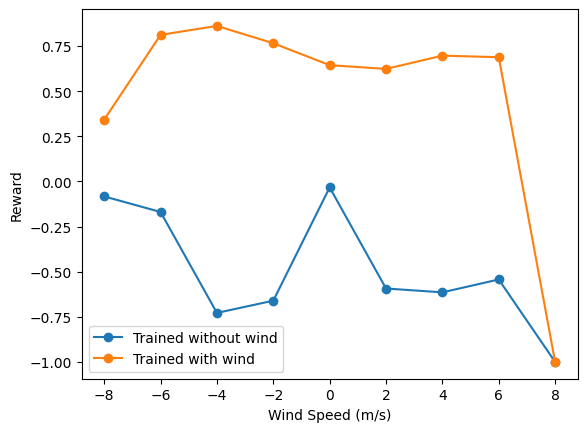

In [5]:
# plot the reward at each wind speed for perching_standard_no_wind and perching_standard_wind
# connect the points with a line
plt.plot(perching_standard_no_wind['Wind Speed'], perching_standard_no_wind['reward'], '-o')
plt.plot(perching_standard_wind['Wind Speed'], perching_standard_wind['reward'], '-o')

# dispplay legend
plt.legend(['Trained without wind', 'Trained with wind'])
# label the x axis
plt.xlabel('Wind Speed (m/s)')
# label the y axis
plt.ylabel('Reward')
# plt.style.use('science')
# diaply plot
plt.show()


/tmp/ipykernel_595969/463324979.py:67: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(normalised_error_standard_no_wind['Wind Speed'], normalised_error_standard_no_wind['norm_velocity'], '-x', color='tab:blue', linestyle='dashed')
/tmp/ipykernel_595969/463324979.py:69: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')


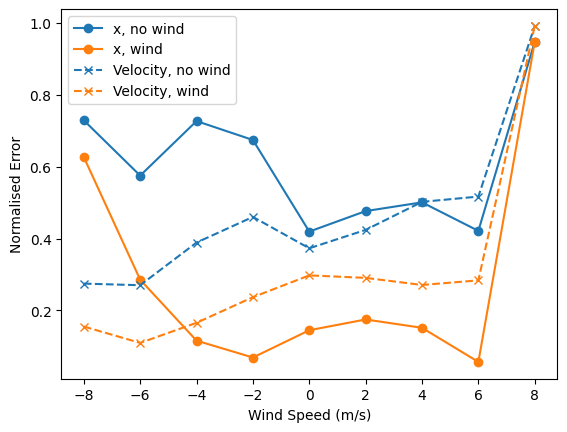

In [71]:
# add a column to df that is the norm velocity
perching_standard_no_wind['norm_velocity'] = np.sqrt(perching_standard_no_wind['u']**2 + perching_standard_no_wind['w']**2)
perching_standard_wind['norm_velocity'] = np.sqrt(perching_standard_wind['u']**2 + perching_standard_wind['w']**2)
perching_long_wind['norm_velocity'] = np.sqrt(perching_long_wind['u']**2 + perching_long_wind['w']**2)

# add new column with theta in degrees
perching_standard_no_wind['theta_deg'] = np.degrees(perching_standard_no_wind['theta'])
perching_standard_wind['theta_deg'] = np.degrees(perching_standard_wind['theta'])
perching_long_wind['theta_deg'] = np.degrees(perching_long_wind['theta'])

# create a new dataframe with the normalised error for each state, at each wind speed, with 1 being maximum error

state_refs = {'x': 40, 'z': 1, 'theta': np.radians(25), 'u': 21, 'w': 10, 'norm_velocity': 21}


# create a new dataframe with the normalised error for each state, at each wind speed, with 1 being maximum error
normalised_error_standard_no_wind = pd.DataFrame()
normalised_error_standard_wind = pd.DataFrame()
normalised_error_long_wind = pd.DataFrame()



normalised_error_standard_no_wind['Wind Speed'] = perching_standard_no_wind['Wind Speed']
normalised_error_standard_wind['Wind Speed'] = perching_standard_wind['Wind Speed']
normalised_error_long_wind['Wind Speed'] = perching_long_wind['Wind Speed']

# loop through each each df and calculate the normalised error for each state
for state in state_refs:
    normalised_error_standard_no_wind[state] = abs(perching_standard_no_wind[state])/state_refs[state]
    normalised_error_standard_wind[state] = abs(perching_standard_wind[state])/state_refs[state]
    normalised_error_long_wind[state] = abs(perching_long_wind[state])/state_refs[state]

# create new df with the normalised error for each state at each wind speed, excluding the first and final row
normalised_error_standard_no_wind_no_last_row = pd.DataFrame()
normalised_error_standard_wind_no_last_row = pd.DataFrame()
normalised_error_long_wind_no_last_row = pd.DataFrame()

normalised_error_standard_no_wind_no_last_row['Wind Speed'] = perching_standard_no_wind['Wind Speed'][1:-1]
normalised_error_standard_wind_no_last_row['Wind Speed'] = perching_standard_wind['Wind Speed'][1:-1]
normalised_error_long_wind_no_last_row['Wind Speed'] = perching_long_wind['Wind Speed'][1:-1]

def normalise(column):
    # find the maximum value in the column
    max_value = column.max()
    # find the minimum value in the column
    min_value = column.min()
    # normalise the column
    normalised_column = (column - min_value) / (max_value - min_value)
    # return the normalised column
    return normalised_column

# loop through each each df and calculate the normalised error for each state
for state in state_refs:
    normalised_error_standard_no_wind_no_last_row[state] = normalise(abs(perching_standard_no_wind[state]))[1:-1]
    normalised_error_standard_wind_no_last_row[state] = normalise(abs(perching_standard_wind[state]))[1:-1]
    normalised_error_long_wind_no_last_row[state] = normalise(abs(perching_long_wind[state]))[1:-1]



# plot the normalised error for x position for perching_standard_no_wind
plt.plot(normalised_error_standard_no_wind['Wind Speed'], normalised_error_standard_no_wind['x'], '-o', color='tab:blue')
# plot the normalised error for x position for perching_standard_wind
plt.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['x'], '-o', color='tab:orange')
# plot the normalised error for x position for perching_long_wind
# plt.plot(normalised_error_long_wind['Wind Speed'], normalised_error_long_wind['x'], '-o')
# plot the normalised error for norm velocity for perching_standard_no_wind
plt.plot(normalised_error_standard_no_wind['Wind Speed'], normalised_error_standard_no_wind['norm_velocity'], '-x', color='tab:blue', linestyle='dashed')
# plot the normalised error for norm velocity for perching_standard_wind
plt.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')
# display the legend
plt.legend(['x, no wind', 'x, wind', 'Velocity, no wind', 'Velocity, wind'])
# label the x axis
plt.xlabel('Wind Speed (m/s)')
# label the y axis
plt.ylabel('Normalised Error')
# plt.style.use(['science','no-latex'])
# display the plot
plt.show()




In [ ]:
# plot

/tmp/ipykernel_595969/2753492988.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(normalised_error_standard_no_wind['Wind Speed'], normalised_error_standard_no_wind['norm_velocity'], '-x', color='tab:blue', linestyle='dashed')
/tmp/ipykernel_595969/2753492988.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')


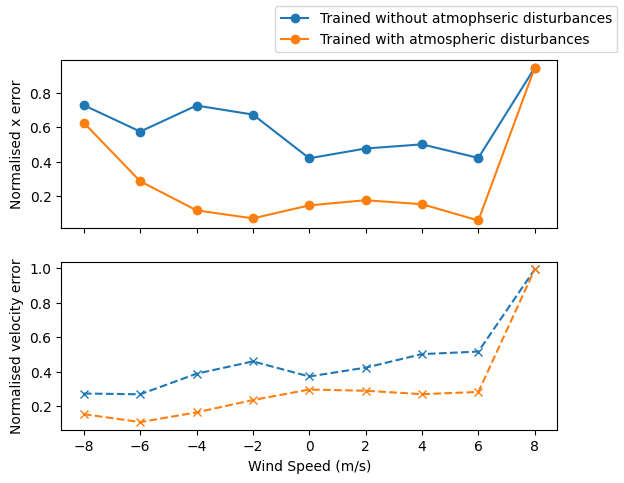

In [7]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# plot the normalised error for x position for perching_standard_no_wind on the first subplot
ax1.plot(normalised_error_standard_no_wind['Wind Speed'], normalised_error_standard_no_wind['x'], '-o', color='tab:blue')
ax1.set_ylabel('Normalised x error')

# plot the normalised error for x position for perching_standard_wind on the first subplot
ax1.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['x'], '-o', color='tab:orange')

# plot the normalised error for norm velocity for perching_standard_no_wind on the second subplot
ax2.plot(normalised_error_standard_no_wind['Wind Speed'], normalised_error_standard_no_wind['norm_velocity'], '-x', color='tab:blue', linestyle='dashed')
ax2.set_ylabel('Normalised velocity error')
ax2.set_xlabel('Wind Speed (m/s)')

# plot the normalised error for norm velocity for perching_standard_wind on the second subplot
ax2.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')

# display the legend
fig.legend(['Trained without atmophseric disturbances', 'Trained with atmospheric disturbances'], loc='upper right')

# display the plot
plt.show()

/tmp/ipykernel_595969/3247487914.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(normalised_error_standard_no_wind['Wind Speed'], perching_standard_no_wind['norm_velocity'], '-x', color='tab:blue', linestyle='dashed')
/tmp/ipykernel_595969/3247487914.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(perching_standard_wind['Wind Speed'], perching_standard_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')
/tmp/ipykernel_595969/3247487914.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax3.plot(perching_standard_no_wind['Wind Speed'], perching_standard_no_wind['theta_deg'

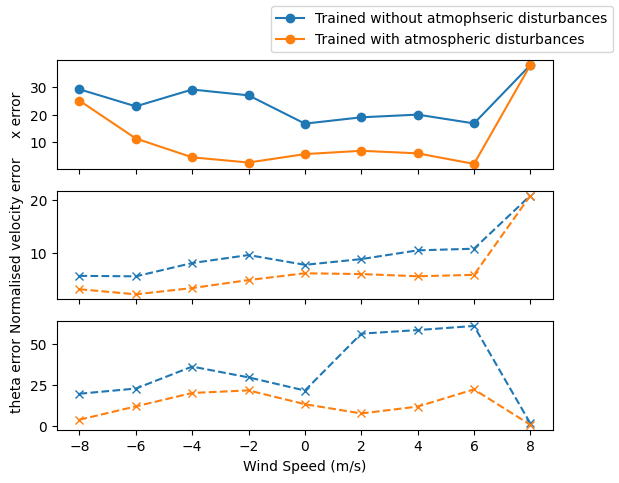

In [73]:
# plot the raw error for x position for perching_standard_no_wind
# create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True) 

# plot the normalised error for x position for perching_standard_no_wind on the first subplot
ax1.plot(perching_standard_no_wind['Wind Speed'], perching_standard_no_wind['x'], '-o', color='tab:blue')
ax1.set_ylabel('x error')

# plot the normalised error for x position for perching_standard_wind on the first subplot
ax1.plot(perching_standard_wind['Wind Speed'], perching_standard_wind['x'], '-o', color='tab:orange')

# plot the normalised error for norm velocity for perching_standard_no_wind on the second subplot
ax2.plot(normalised_error_standard_no_wind['Wind Speed'], perching_standard_no_wind['norm_velocity'], '-x', color='tab:blue', linestyle='dashed')
ax2.set_ylabel('Normalised velocity error')
# ax2.set_xlabel('Wind Speed (m/s)')

# plot the normalised error for norm velocity for perching_standard_wind on the second subplot
ax2.plot(perching_standard_wind['Wind Speed'], perching_standard_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')

ax3.plot(perching_standard_no_wind['Wind Speed'], perching_standard_no_wind['theta_deg'], '-x', color='tab:blue', linestyle='dashed')
ax3.set_ylabel('theta error')
ax3.set_xlabel('Wind Speed (m/s)')

ax3.plot(perching_standard_wind['Wind Speed'], perching_standard_wind['theta_deg'], '-x', color='tab:orange', linestyle='dashed')

# display the legend
fig.legend(['Trained without atmophseric disturbances', 'Trained with atmospheric disturbances'], loc='upper right')

# display the plot
plt.show()

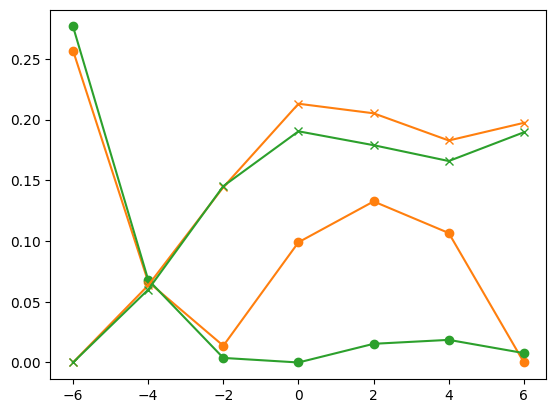

In [50]:

# plot the normalised error for x position for perching_standard_wind, expect 
plt.plot(normalised_error_standard_wind_no_last_row['Wind Speed'], normalised_error_standard_wind_no_last_row['x'], '-o', color='tab:orange')
# now for perching_long_wind
plt.plot(normalised_error_long_wind_no_last_row['Wind Speed'], normalised_error_long_wind_no_last_row['x'], '-o', color='tab:green')
# plot the normalised error for norm velocity for perching_standard_wind
plt.plot(normalised_error_standard_wind_no_last_row['Wind Speed'], normalised_error_standard_wind_no_last_row['norm_velocity'], '-x', color='tab:orange')
# now for perching_long_wind
plt.plot(normalised_error_long_wind_no_last_row['Wind Speed'], normalised_error_long_wind_no_last_row['norm_velocity'], '-x', color='tab:green')

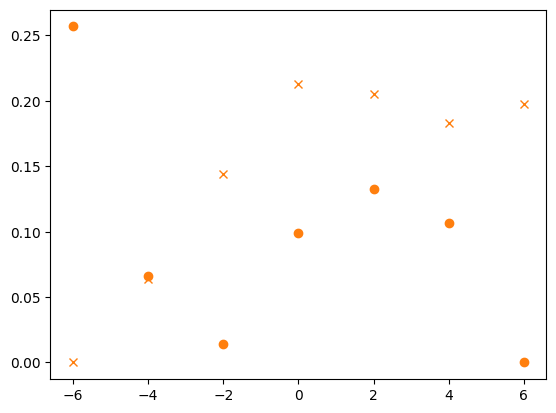

In [57]:
# plot normalised error for x position for perching_standard_wind against reward
plt.plot(perching_standard_wind['Wind Speed'][1:-1], normalised_error_standard_wind_no_last_row['x'], 'o', color='tab:orange')
plt.plot(perching_standard_wind['Wind Speed'][1:-1], normalised_error_standard_wind_no_last_row['norm_velocity'], 'x', color='tab:orange')



/tmp/ipykernel_595512/1329601632.py:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')


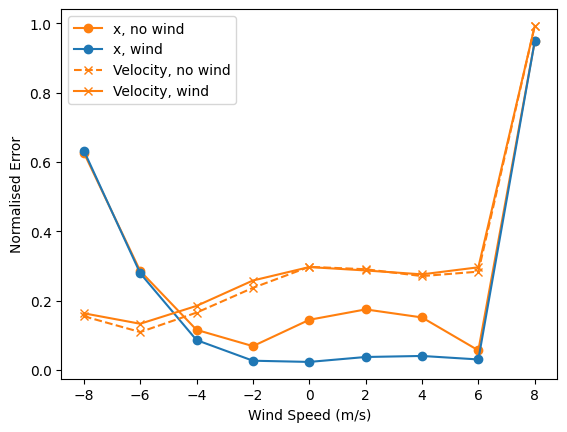

In [19]:
# plot the normalised error for x position for perching_standard_no_wind
# plt.plot(normalised_error_standard_no_wind['Wind Speed'], normalised_error_standard_no_wind['x'], '-o', color='tab:blue')
# plot the normalised error for x position for perching_standard_wind
plt.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['x'], '-o', color='tab:orange')
# plot the normalised error for x position for perching_long_wind
plt.plot(normalised_error_long_wind['Wind Speed'], normalised_error_long_wind['x'], '-o')
# plot the normalised error for norm velocity for perching_standard_no_wind
# plt.plot(normalised_error_standard_no_wind['Wind Speed'], normalised_error_standard_no_wind['norm_velocity'], '-x', color='tab:blue', linestyle='dashed')
# plot the normalised error for norm velocity for perching_standard_wind
plt.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')
# plot the normalised error for norm velocity for perching_long_wind
plt.plot(normalised_error_long_wind['Wind Speed'], normalised_error_long_wind['norm_velocity'], '-x')
# display the legend
plt.legend(['x, no wind', 'x, wind', 'Velocity, no wind', 'Velocity, wind'])
# label the x axis
plt.xlabel('Wind Speed (m/s)')
# label the y axis
plt.ylabel('Normalised Error')
# plt.style.use(['science','no-latex'])
# display the plot
plt.show()

/tmp/ipykernel_595969/1449368420.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(perching_standard_no_wind['Wind Speed'], perching_standard_no_wind['norm_velocity'], '-x', color='tab:blue', linestyle='dashed')
/tmp/ipykernel_595969/1449368420.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(perching_long_wind['Wind Speed'], perching_long_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')
/tmp/ipykernel_595969/1449368420.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax3.plot(perching_standard_no_wind['Wind Speed'], perching_standard_no_wind['theta_deg'], '-x', color='

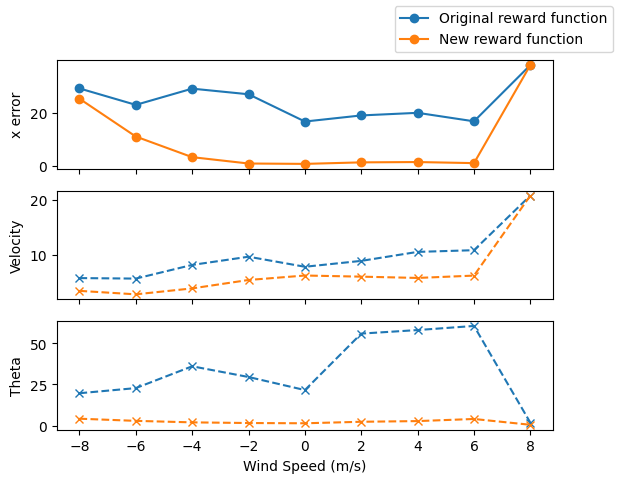

In [77]:
# create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

# plot the x position for perching_standard_no_wind on the first subplot
ax1.plot(perching_standard_no_wind['Wind Speed'], perching_standard_no_wind['x'], '-o', color='tab:blue')
ax1.set_ylabel('x error')

# plot the x position for perching_standard_wind on the first subplot
ax1.plot(perching_long_wind['Wind Speed'], perching_long_wind['x'], '-o', color='tab:orange')

# plot the norm velocity for perching_standard_no_wind on the second subplot
ax2.plot(perching_standard_no_wind['Wind Speed'], perching_standard_no_wind['norm_velocity'], '-x', color='tab:blue', linestyle='dashed')
ax2.set_ylabel('Velocity')
# ax2.set_xlabel('Wind Speed (m/s)')

# plot the norm velocity for perching_standard_wind on the second subplot
ax2.plot(perching_long_wind['Wind Speed'], perching_long_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')

# plot the theta error for perching_standard_wind on the third subplot
ax3.plot(perching_standard_no_wind['Wind Speed'], perching_standard_no_wind['theta_deg'], '-x', color='tab:blue', linestyle='dashed')
ax3.set_ylabel('Theta')
ax3.set_xlabel('Wind Speed (m/s)')
# plot the theta error for perching_long_wind on the third subplot
ax3.plot(perching_long_wind['Wind Speed'], perching_long_wind['theta_deg'], '-x', color='tab:orange', linestyle='dashed')

# display the legend
fig.legend(['Original reward function', 'New reward function'], loc='upper right')

# display the plot
plt.show()

/tmp/ipykernel_595969/1534008065.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['norm_velocity'], '-x', color='tab:blue', linestyle='dashed')
/tmp/ipykernel_595969/1534008065.py:17: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(normalised_error_long_wind['Wind Speed'], normalised_error_long_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')
/tmp/ipykernel_595969/1534008065.py:20: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  ax3.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_stand

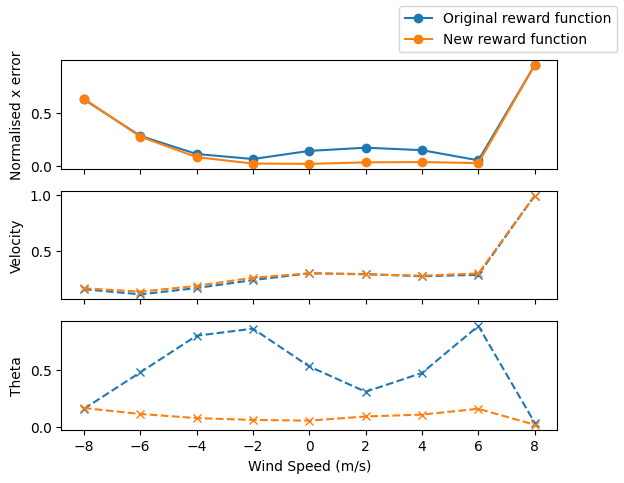

In [76]:
# create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

# plot the normalised error for x position for perching_standard_no_wind on the first subplot
ax1.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['x'], '-o', color='tab:blue')
ax1.set_ylabel('Normalised x error')

# plot the normalised error for x position for perching_standard_wind on the first subplot
ax1.plot(normalised_error_long_wind['Wind Speed'], normalised_error_long_wind['x'], '-o', color='tab:orange')

# plot the normalised error for norm velocity for perching_standard_no_wind on the second subplot
ax2.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['norm_velocity'], '-x', color='tab:blue', linestyle='dashed')
ax2.set_ylabel('Velocity')
# ax2.set_xlabel('Wind Speed (m/s)')

# plot the normalised error for norm velocity for perching_standard_wind on the second subplot
ax2.plot(normalised_error_long_wind['Wind Speed'], normalised_error_long_wind['norm_velocity'], '-x', color='tab:orange', linestyle='dashed')

# plot the normalised theta error for perching_standard_wind on the third subplot
ax3.plot(normalised_error_standard_wind['Wind Speed'], normalised_error_standard_wind['theta'], '-x', color='tab:blue', linestyle='dashed')
ax3.set_ylabel('Theta')
ax3.set_xlabel('Wind Speed (m/s)')
# plot the normalised theta error for perching_long_wind on the third subplot
ax3.plot(normalised_error_long_wind['Wind Speed'], normalised_error_long_wind['theta'], '-x', color='tab:orange', linestyle='dashed')

# display the legend
fig.legend(['Original reward function', 'New reward function'], loc='upper right')

# display the plot
plt.show()

In [9]:
normalised_error_standard_wind

,Wind Speed,x,z,theta,u,w,norm_velocity
0,-8.0,0.626770,0.116761,0.158619,0.147866,0.098173,0.155080
1,-6.0,0.285497,0.076283,0.480880,0.079505,0.158021,0.109469
2,-4.0,0.115773,0.116469,0.805397,0.067589,0.317286,0.165517
3,-2.0,0.068840,0.195185,0.867951,0.051992,0.485316,0.236879
4,0.0,0.144796,0.299983,0.533661,0.033199,0.620945,0.297546
5,2.0,0.174761,0.323748,0.309966,0.030751,0.606820,0.290594
6,4.0,0.151568,0.264966,0.476350,0.055933,0.556481,0.270830
7,6.0,0.056575,0.247315,0.891894,0.087453,0.566692,0.283670
8,8.0,0.947727,4.993778,0.035783,0.992047,0.030995,0.992157


In [62]:
# create new df with only wind speed, x theta and norm velocity
normalised_error_standard_wind_2 = normalised_error_standard_wind_no_last_row[['Wind Speed', 'x', 'theta', 'norm_velocity']]
normalised_error_long_wind_2 = normalised_error_long_wind_no_last_row[['Wind Speed', 'x', 'theta', 'norm_velocity']]

In [16]:
normalised_error_standard_wind_2

,Wind Speed,x,theta,norm_velocity
0,-8.0,0.626770,0.158619,0.155080
1,-6.0,0.285497,0.480880,0.109469
2,-4.0,0.115773,0.805397,0.165517
3,-2.0,0.068840,0.867951,0.236879
4,0.0,0.144796,0.533661,0.297546
5,2.0,0.174761,0.309966,0.290594
6,4.0,0.151568,0.476350,0.270830
7,6.0,0.056575,0.891894,0.283670
8,8.0,0.947727,0.035783,0.992157


In [63]:
# calculate the average error across x, theta and normalised velcoity for each wind speed for perching_standard_wind
# set wind speed as the index
normalised_error_standard_wind_2 = normalised_error_standard_wind_2.set_index('Wind Speed')
normalised_error_long_wind_2 = normalised_error_long_wind_2.set_index('Wind Speed')
# calculate the mean for each wind speed across x, theta and normalised velocity
average_error_standard_wind = normalised_error_standard_wind_2.mean(axis=1)
average_error_long_wind = normalised_error_long_wind_2.mean(axis=1)





In [64]:
average_error_standard_wind

Wind Speed
-6.0    0.258930
-4.0    0.342964
-2.0    0.376713
 0.0    0.297876
 2.0    0.219362
 4.0    0.268005
 6.0    0.399118
dtype: float64

In [65]:
# creat a df with the normalised reward for each wind speed for perching_standard_wind

# create normalisation function
def normalise(column):
    # find the maximum value in the column
    max_value = column.max()
    # find the minimum value in the column
    min_value = column.min()
    # normalise the column
    normalised_column = (column - min_value) / (max_value - min_value)
    # return the normalised column
    return normalised_column

# create a df with the normalised reward for each wind speed for perching_standard_wind
normalised_reward_standard_wind = perching_standard_wind[['Wind Speed', 'reward']][1:-1]
norramlised_reward_long_wind = perching_long_wind[['Wind Speed', 'reward']][1:-1]
# normalise the reward column
normalised_reward_standard_wind['reward'] = normalise(normalised_reward_standard_wind['reward'])
norramlised_reward_long_wind['reward'] = normalise(norramlised_reward_long_wind['reward'])
# set wind speed as the index
normalised_reward_standard_wind = normalised_reward_standard_wind.set_index('Wind Speed')
norramlised_reward_long_wind = norramlised_reward_long_wind.set_index('Wind Speed')

normalised_reward_standard_wind






,reward
Wind Speed,
-6.0,0.792777
-4.0,1.000000
-2.0,0.597392
0.0,0.087681
2.0,0.000000
4.0,0.308555
6.0,0.272886


Text(0, 0.5, 'Average Error')

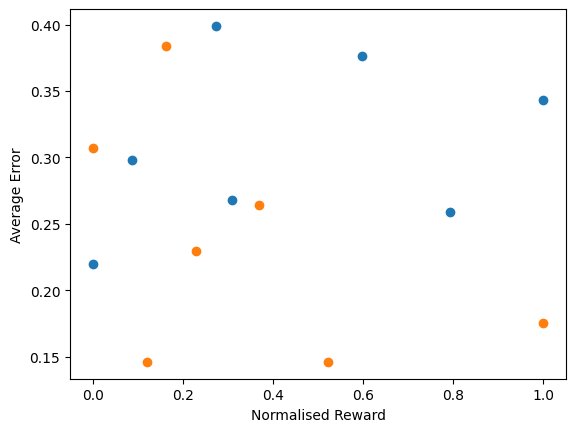

In [67]:
# plot the average error for perching_standard_wind against reward, reward on the x axis, average error on the y axis


plt.plot(normalised_reward_standard_wind["reward"], average_error_standard_wind, 'o', color='tab:blue')
plt.plot(norramlised_reward_long_wind["reward"], average_error_long_wind, 'o', color='tab:orange')
plt.xlabel('Normalised Reward')
plt.ylabel('Average Error')
# plt.legend(["Baseline reward function", "New reward function"])